![image](https://github.com/ecastillot/SeisMonitor/blob/master/docs/figures/seismonitor.PNG?raw=true)

**This code is necessary on colab to install SeisMonitor.** 

In [ ]:
!pip install SeisMonitor
!pip install git+https://github.com/wayneweiqiang/GaMMA.git

In [9]:
import sys
repository_path = r"/home/emmanuel/SeisMonitor"  
sys.path.insert(0,repository_path)

**Please restart the kernel. It's mandatory to get everything up and running.**

Firstable, as we are using colab, we have to download the picks data for this example.

In [10]:
import sys
import os
if 'google.colab' in sys.modules:
    !git clone https://github.com/ecastillot/SeisMonitor.git /content/SeisMonitor
    repository_path = r"/content/SeisMonitor/examples"  
    sys.path.insert(0,repository_path)
else:
    repository_path = os.path.dirname(os.getcwd())


We will use seismic phases picked by PhaseNet and EQTransformer using the SeisMonitor format. Take a look in [2.picker.ipynb](https://colab.research.google.com/github/ecastillot/SeisMonitor/blob/master/examples/2.picker.ipynb). 

We will associate those seismic phases using GaMMA.

# Association with GaMMA

In [11]:
import os
from SeisMonitor.monitor.associator.ai import GaMMA,GaMMAObj
from SeisMonitor.monitor.associator import utils as asut

We create the object: GaMMAObj, which contains the GaMMA parameters.

In [12]:
region = [-76.729, -72.315,1.55, 5.314,0, 150]
gc = GaMMAObj(region,"EPSG:3116",
                use_amplitude = False,
                use_dbscan=False,
                calculate_amp=False)

- GaMMA is instanced with GaMMAObj.
- We use **asociate** method to asociate seismic phases. The input parameters are:
    - Picks filepath using seismonitor format.
    - Inventory filepath of the seismic network.
    - Output folder for GaMMA

## Associations for EQTransformer picks

In [13]:
data = os.path.join(repository_path,"data")

inv = os.path.join(data,"stations","inv.xml")
picks = os.path.join(data,"picks","eqt_seismonitor_picks.csv")
out_dir = os.path.join(repository_path,"asso","eqt","gamma.csv")

g = GaMMA(gc)
obspy_catalog, df_catalog,df_picks = g.associate(picks,inv,out_dir)
print(obspy_catalog)

28 Event(s) in Catalog:
2019-12-24T19:56:35.090000Z |  +3.323,  -74.031 | automatic
2019-12-24T19:10:10.891000Z |  +5.065,  -74.872 | automatic
...
2019-12-24T22:46:28.965000Z |  +3.235,  -74.183 | automatic
2019-12-24T22:47:36.422000Z |  +3.065,  -73.997 | automatic
To see all events call 'print(CatalogObject.__str__(print_all=True))'


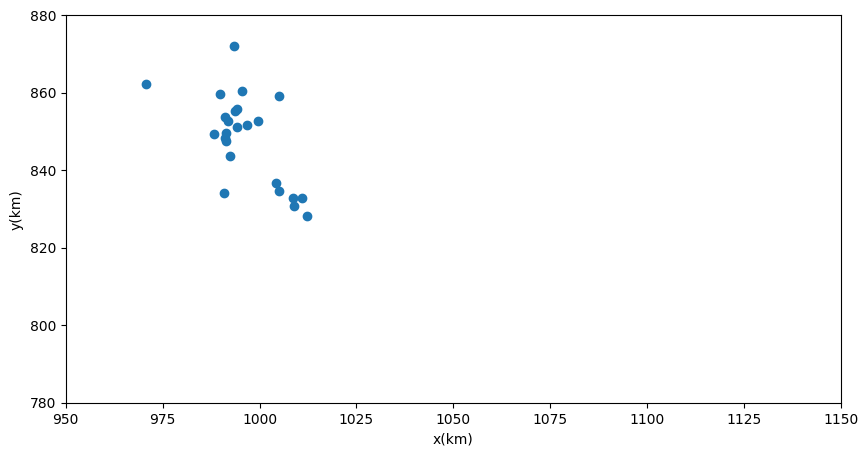

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.scatter(df_catalog["x(km)"], df_catalog["y(km)"])
ax.set_xlabel("x(km)")
ax.set_ylabel("y(km)")
ax.set_xlim(950,1050)
ax.set_ylim(780,880)
plt.show()

## Associations with PhaseNet

In [15]:
data = os.path.join(repository_path,"data")

inv = os.path.join(data,"stations","inv.xml")
picks = os.path.join(data,"picks","pnet_seismonitor_picks.csv")
out_dir = os.path.join(repository_path,"asso","pnet","gamma.csv")

g = GaMMA(gc)
obspy_catalog, df_catalog,df_picks = g.associate(picks,inv,out_dir)
print(obspy_catalog)


















Skip 0 picks: : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

0 Event(s) in Catalog:



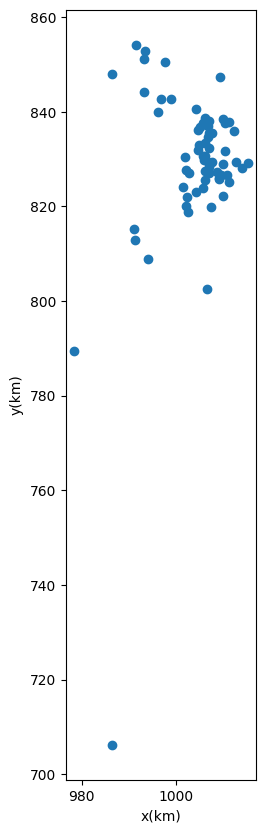

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
ax.scatter(df_catalog["x(km)"], df_catalog["y(km)"])
ax.set_xlabel("x(km)")
ax.set_ylabel("y(km)")
ax.set_xlim(950,1150)
ax.set_ylim(780,880)
plt.show()